summary statistics & graph: variable table; mode; violin plot for continuous variable; calculate skewness and kurtosis

train and test data set 20:80

2. (a) function day; classification; (resample:smote); (lda;knn,rf,svm);hour not considered (Yahan)
  
   (b) fit with known distribution: poisson(2 parameters; lambda; link function); mixed effect model; B-spline: parameter tuning; opimization algo(gradient-based; gridsearch; by hand) 
   
   metric: MSE, adj R2; loglikelihood; aic; bic (Jade)

   (c) ml method: variable important. PCA (Yahan) ; ramdom forest (Jade)(if available; do regularized rf); (neural network); (time series)  

In [113]:
import pandas as pd
import numpy as np

In [114]:
data=pd.read_csv("../data/SeoulBikeData.csv",encoding='ISO-8859-1', parse_dates=[0])
data.head()

/var/folders/y4/28brlbwj69l564mymy3f04wm0000gn/T/ipykernel_16584/1125663706.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data=pd.read_csv("../data/SeoulBikeData.csv",encoding='ISO-8859-1', parse_dates=[0])


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [159]:
data=data.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature', "Rented Bike Count": "Count"})

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Count                  8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Radiation              8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

## Part 1

summary statistics & graph: variable table; mode; violin plot for continuous variable; calculate skewness and kurtosis

In [161]:
data.columns

Index(['Date', 'Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

In [162]:
contious_variables=data[['Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Radiation', 'Rainfall', 'Snowfall', 'Count']]
contious_variables.apply(lambda x: x.mode().iloc[0])

Temperature                19.1
Humidity                   53.0
Wind speed                  1.1
Visibility               2000.0
Dew point temperature       0.0
Radiation                   0.0
Rainfall                    0.0
Snowfall                    0.0
Count                       0.0
dtype: float64

In [163]:
contious_variables.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,8760.0,12.882922,11.944825,-17.8,3.5,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.0,57.00,74.00,98.00
Wind speed,8760.0,1.724909,1.036300,0.0,0.9,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.0,1698.00,2000.00,2000.00
Dew point temperature,8760.0,4.073813,13.060369,-30.6,-4.7,5.10,14.80,27.20
Radiation,8760.0,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.0,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.0,0.00,0.00,8.80
Count,8760.0,704.602055,644.997468,0.0,191.0,504.50,1065.25,3556.00


In [120]:
contious_variables.apply(lambda x: x.skew())

Temperature              -0.198326
Humidity                  0.059579
Wind speed                0.890955
Visibility               -0.701786
Dew point temperature    -0.367298
Radiation                 1.504040
Rainfall                 14.533232
Snowfall                  8.440801
Rented Bike Count         1.153428
dtype: float64

In [121]:
contious_variables.apply(lambda x: x.kurtosis())

Temperature               -0.837786
Humidity                  -0.803559
Wind speed                 0.727179
Visibility                -0.961980
Dew point temperature     -0.755430
Radiation                  1.126433
Rainfall                 284.991099
Snowfall                  93.803324
Rented Bike Count          0.853387
dtype: float64

In [122]:
import rpy2
%reload_ext rpy2.ipython

In [123]:
%%R -i contious_variables -i data
head(contious_variables)
head(data)
str(data)

'data.frame':	8760 obs. of  14 variables:
 $ Date                 : POSIXct, format: "2017-01-12" "2017-01-12" ...
 $ Rented Bike Count    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ Hour                 : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Temperature          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ Humidity             : int  37 38 39 40 36 37 35 38 37 27 ...
 $ Wind speed           : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ Visibility           : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ Dew point temperature: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ Radiation            : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ Holiday              : chr  "No Holiday" "No Holiday" "No Holiday" "No Holiday" ...
 $ Functioning Day      : ch

In [164]:
%%R
library(ggplot2)
library(reshape2)
contious_variables_name <- colnames(contious_variables)
colnames <- colnames(data)
other_variable_name <- colnames[!colnames %in% contious_variables_name]
data_without_count <- 
data_melt <- melt(data[, -c(2, 7)], id=other_variable_name)
colnames
contious_variables_name
other_variable_name

[1] "Date"            "Hour"            "Seasons"         "Holiday"        
[5] "Functioning Day"


In [165]:
%%R
str(data_melt)

'data.frame':	61320 obs. of  7 variables:
 $ Date           : POSIXct, format: "2017-01-12" "2017-01-12" ...
 $ Hour           : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Seasons        : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ Holiday        : chr  "No Holiday" "No Holiday" "No Holiday" "No Holiday" ...
 $ Functioning Day: chr  "Yes" "Yes" "Yes" "Yes" ...
 $ variable       : Factor w/ 7 levels "Temperature",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...


In [166]:
%%R
data_melt$variable <- as.character(data_melt$variable)

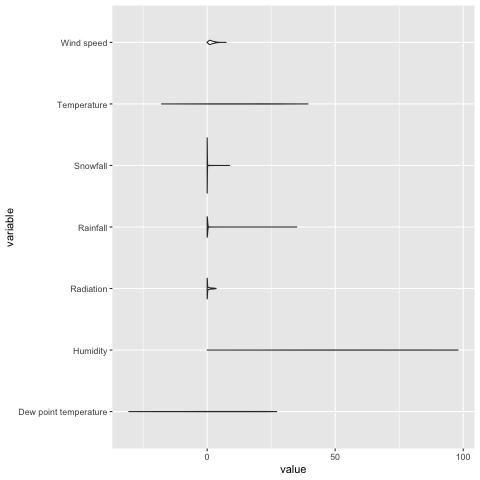

In [167]:
%%R
ggplot(data_melt)+
aes(y=variable, x=value)+
geom_violin()
# geom_boxplot()+
# facet_grid(Holiday~Seasons)

<Axes: xlabel='features', ylabel='value'>

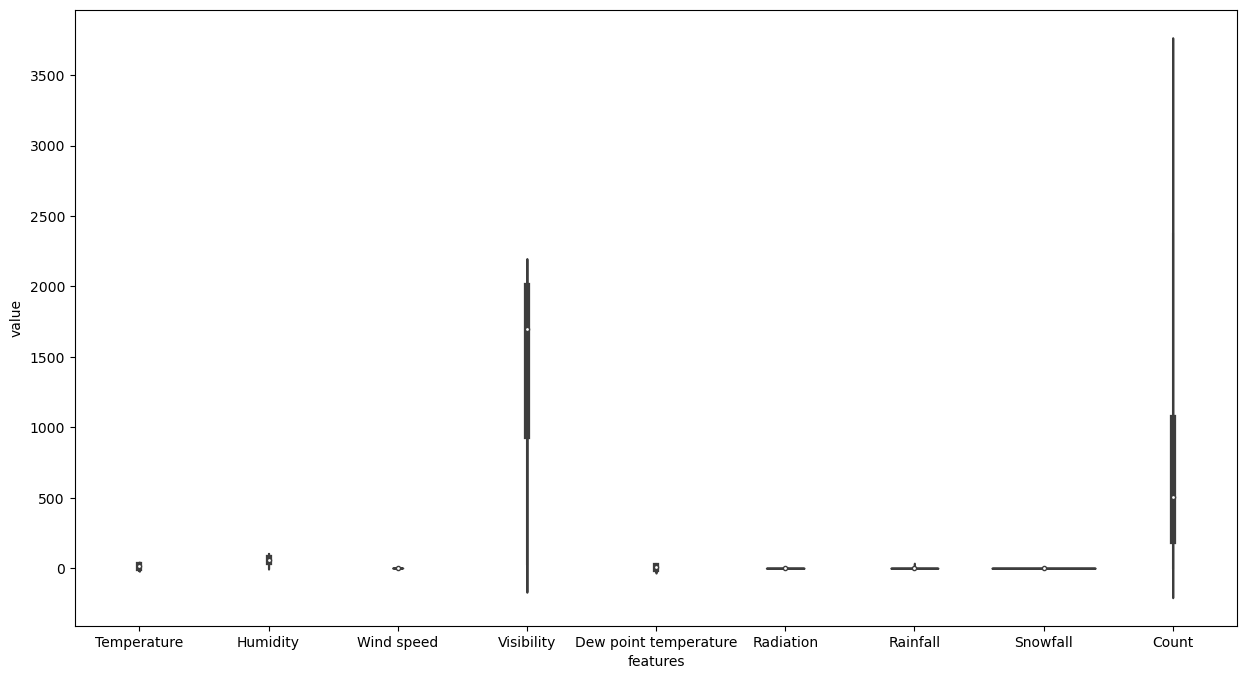

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
contious_variables_melt=contious_variables.melt(var_name='features', value_name='value')
plt.figure(figsize=(15, 8))
sns.violinplot(x='features', y='value', data=contious_variables_melt)

because of the value scale here

## Part2

fit with known distribution: poisson(2 parameters; lambda; link function); mixed effect model; B-spline: parameter tuning; opimization algo(gradient-based; gridsearch; by hand)

### count does not follow poisson distribution, but try fit with GLM

In [169]:
data_functioning=data[data["Functioning Day"]=='Yes'].drop(columns="Functioning Day", axis=1)

In [170]:
data_functioning

,Date,Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


### fit with poisson distribution

In [171]:
from scipy.stats import kstest, norm, poisson, nbinom
norm_params=norm.fit(data_functioning['Count'])
ks_statistic, p_value=kstest(data_functioning['Count'], 'norm', norm_params)
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.1288630535997683
P-value: 5.213263461611876e-123


In [132]:
ks_statistic, p_value=kstest(data_functioning['Count'], 'poisson', args=(data_functioning['Count'].mean(), ))
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.5560968336343938
P-value: 0.0


In [133]:
r=30.5
p=0.15
ks_statistic, p_value=kstest(data_functioning['Count'], 'nbinom', args=(r,p))
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.6888420489865845
P-value: 0.0


In [134]:
r_values=np.linspace(1, 50, 100)
p_values=np.linspace(0.01, 0.1, 100)
min_ks_statistic=np.inf
max_p_statistic=np.inf
best_r=None
best_p=None
for r in r_values:
    for p in p_values:
        ks_statistic, p_value=kstest(data_functioning['Count'], 'nbinom', args=(r,p))
        if ks_statistic < min_ks_statistic:
            min_ks_statistic=ks_statistic
            max_p_statistic=p_value
            best_r=r
            best_p=p
print("Best Parameters, r:", best_r, "p:", best_p)
print("Minimum KS Statistic:", min_ks_statistic, "Maximum p value:", max_p_statistic)

Best Parameters, r: 5.94949494949495 p: 0.01
Minimum KS Statistic: 0.2565696008756877 Maximum p value: 0.0


no common distribution suitable for fit

### Linear mixed effect model

important group variable: season, hour, day(in a week)

feature engineering to add a `day` feature

In [172]:
data_functioning['Day']=data_functioning['Date'].dt.day_of_week

In [173]:
data_functioning.drop(columns='Date', inplace=True)

In [174]:
data_functioning.columns

Index(['Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',
       'Dew point temperature', 'Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Day'],
      dtype='object')

In [256]:
# data_functioning_melt=pd.melt(data_functioning, value_vars=['Hour', 'Seasons', 'Holiday', 'Day'], id_vars=data_functioning.loc[ : , "Temperature":"Snowfall"].columns.tolist()+['Count'], var_name='Variable')
data_functioning_melt=pd.melt(data_functioning, value_vars=['Holiday', "Seasons"], id_vars=data_functioning.loc[ : , "Temperature":"Snowfall"].columns.tolist()+['Count'], var_name='Variable')

In [258]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
x=data_functioning_melt.loc[:, "Temperature":"Snowfall"]
x=sm.add_constant(x)
y=data_functioning_melt['Count']
lme=sm.MixedLM(y, x, groups=data_functioning_melt['Variable'])
lme_fit=lme.fit()
print(lme_fit.summary())


/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                 Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     Count       
No. Observations:      16930       Method:                 REML        
No. Groups:            2           Scale:                  234235.5662 
Min. group size:       8465        Log-Likelihood:         -128672.4069
Max. group size:       8465        Converged:              No          
Mean group size:       8465.0                                          
-----------------------------------------------------------------------
                       Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
-----------------------------------------------------------------------
const                  872.324   76.043  11.471 0.000  723.283 1021.365
Temperature             36.033    2.869  12.560 0.000   30.410   41.656
Humidity               -10.827    0.815 -13.288 0.000  -12.424   -9.230
Wind speed              53.676    3.938  13.631 0.000   45.958   61.395
Visibilit

/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 16.017797
  warnings.warn(msg, ConvergenceWarning)
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [259]:
data_functioning_melt

,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Count,Variable,value
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254,Holiday,1
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204,Holiday,1
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173,Holiday,1
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107,Holiday,1
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78,Holiday,1
...,...,...,...,...,...,...,...,...,...,...,...
16925,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1003,Seasons,0
16926,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,764,Seasons,0
16927,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,694,Seasons,0
16928,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,712,Seasons,0


In [260]:
x=data_functioning_melt.loc[:, ["Temperature", "Humidity", "Wind speed", "Visibility", "Radiation", "Snowfall"]]
x=sm.add_constant(x)
y=data_functioning_melt['Count']
lme=sm.MixedLM(y, x, groups=data_functioning_melt['Variable'])
lme_fit=lme.fit()
print(lme_fit.summary())

/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Count       
No. Observations:  16930    Method:              REML        
No. Groups:        2        Scale:               237592.5348 
Min. group size:   8465     Log-Likelihood:      -128797.9866
Max. group size:   8465     Converged:           No          
Mean group size:   8465.0                                    
-------------------------------------------------------------
             Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
-------------------------------------------------------------
const        889.240   33.032  26.921 0.000  824.500  953.981
Temperature   36.590    0.386  94.885 0.000   35.834   37.345
Humidity     -11.363    0.280 -40.615 0.000  -11.911  -10.815
Wind speed    50.233    3.955  12.701 0.000   42.481   57.984
Visibility     0.008    0.008   1.057 0.290   -0.007    0.023
Radiation   -119.869    5.916 -20.261 0.000 -131.465 -108.273
Snowfall      40.199

/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 16.017797
  warnings.warn(msg, ConvergenceWarning)
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [261]:
x=data_functioning_melt.loc[:, ["Temperature", "Humidity", "Wind speed", "Radiation", "Snowfall"]]
x=sm.add_constant(x)
y=data_functioning_melt['Count']
lme=sm.MixedLM(y, x, groups=data_functioning_melt['Variable'])
lme_fit=lme.fit()
print(lme_fit.summary())

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Count       
No. Observations:  16930    Method:              REML        
No. Groups:        2        Scale:               237594.1857 
Min. group size:   8465     Log-Likelihood:      -128794.5925
Max. group size:   8465     Converged:           Yes         
Mean group size:   8465.0                                    
-------------------------------------------------------------
             Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
-------------------------------------------------------------
const        909.822   26.684  34.096 0.000  857.523  962.122
Temperature   36.685    0.375  97.849 0.000   35.950   37.420
Humidity     -11.529    0.231 -49.846 0.000  -11.983  -11.076
Wind speed    50.429    3.951  12.765 0.000   42.687   58.172
Radiation   -121.349    5.748 -21.111 0.000 -132.616 -110.083
Snowfall      40.035    8.800   4.550 0.000   22.788   57.282
Group Var    868.999

/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/yujinxin/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [270]:
data_functioning_melt

,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Count,Variable,value
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254,Holiday,1
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204,Holiday,1
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173,Holiday,1
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107,Holiday,1
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78,Holiday,1
...,...,...,...,...,...,...,...,...,...,...,...
16925,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1003,Seasons,0
16926,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,764,Seasons,0
16927,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,694,Seasons,0
16928,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,712,Seasons,0


In [278]:
data_functioning_melt.rename(columns={"Wind speed": "Wind_speed", "Dew point temperature" : "Dew_point_temperature"}, inplace=True)

In [279]:
model = sm.MixedLM.from_formula("Count ~ Temperature + Humidity+ Wind_speed + Radiation + Rainfall+ Snowfall + C(Variable)", data=data_functioning_melt, groups=data_functioning_melt["Variable"])
result = model.fit()
print(result.summary())

                      Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        Count       
No. Observations:          16930          Method:                    REML        
No. Groups:                2              Scale:                     234223.7219 
Min. group size:           8465           Log-Likelihood:            -128665.8892
Max. group size:           8465           Converged:                 Yes         
Mean group size:           8465.0                                                
---------------------------------------------------------------------------------
                         Coef.       Std.Err.       z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------
Intercept                 864.482        484.273   1.785 0.074   -84.675 1813.639
C(Variable)[T.Seasons]      0.000        684.473   0.000 1.000 -1341.542 1341.542
Temperature                36.643     

In [285]:
np.mean(result.resid**2)

234113.0432210297

### GAM model

Polynomials can increase fit, but often don’t work well out-of-sample

Compared to B-spline, GAM could be a better option. 

parameter tuning; opimization algo(gradient-based; gridsearch; by hand)

In [262]:
import pygam
from sklearn.preprocessing import LabelEncoder

In [263]:
label_encoder=LabelEncoder()
data_functioning['Holiday']=label_encoder.fit_transform(data_functioning['Holiday'])
data_functioning['Seasons']=label_encoder.fit_transform(data_functioning['Seasons'])
X=data_functioning.iloc[:, 1:]
y=data_functioning['Count']

In [264]:
linear_gam=pygam.PoissonGAM()
linear_gam.fit(X, y)

PoissonGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + intercept,
   tol=0.0001, verbose=False)

In [265]:
predictions=linear_gam.predict(X)

In [266]:
# calculate R sauqre
expalined_var=np.var(predictions-y)
total_var=np.var(y)
r_squared=1-(expalined_var/total_var)
r_squared

0.8502887816948287

In [267]:
# mse
np.mean((predictions-y)**2)

61765.79995321254